# HW 6: Centrality
    Abraham Harris

In [2]:
import networkx as nx
import numpy as np
import plotting_utilities as pu
from network_utilities import adjacency_list_to_digraph

### 8.

Manual power iteration for different starting guesses

In [13]:
A = np.array(
    [[0, 1, 0, 0, 0],
     [0, 0, 1, 0, 0],
     [0, 0, 0, 1, 0],
     [0, 0, 0, 0, 1],
     [1, 0, 0, 0, 0]]
)

x0 = np.array([1, 1, 1, 1, 1])

for _ in range(10):
    x_next = A.T @ x0 / np.linalg.norm(x0)
    x0 = x_next
print(x_next)

[0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]


Eigenvector centrality for a strongly connected network.

In [2]:
def getG():
    G = nx.DiGraph()
    G.add_nodes_from([1,2,3,4,5])
    G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])
    pos = nx.nx_pydot.graphviz_layout(G,prog='neato')
    return G, pos

G_cycle, _ = getG()

eig_centrality = nx.eigenvector_centrality(G_cycle, max_iter=1000)
print("\nEigenvector Centrality (NetworkX):")
print("=" * 40)
for node in sorted(eig_centrality.keys()):
    print(f"Node {node}: {eig_centrality[node]:.2f}")


Eigenvector Centrality (NetworkX):
Node 1: 0.45
Node 2: 0.45
Node 3: 0.45
Node 4: 0.45
Node 5: 0.45


Eigenvector centrality for a graph that is not strongly connected.

In [3]:
def getG():
    G = nx.DiGraph()
    G.add_nodes_from([1,2,3,4,5,6])
    G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(4,1),(5,6),(6,5)])
    pos = nx.nx_pydot.graphviz_layout(G,prog='neato')
    return G, pos

G_cycle, _ = getG()

eig_centrality = nx.eigenvector_centrality(G_cycle, max_iter=1000)
print("\nEigenvector Centrality (NetworkX):")
print("=" * 40)
for node in sorted(eig_centrality.keys()):
    print(f"Node {node}: {eig_centrality[node]:.2f}")

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

### 11.

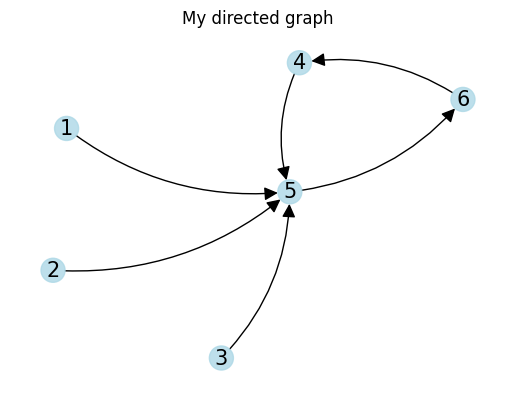

In [4]:
adjacency_list: dict[int, set[int]] = {
    1: {5},
    2: {5},
    3: {5},
    4: {5},
    5: {6},
    6: {4}
}
G = adjacency_list_to_digraph(adjacency_list)

pu.show_digraph(G)

In [5]:
eig = nx.eigenvector_centrality(G, max_iter=2000)
katz = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0)
print("Eigenvector centrality:\n", eig)
print("Katz centrality:\n", katz)

Eigenvector centrality:
 {1: 5.506046483931412e-07, 5: 0.5773513703981349, 2: 5.506046483931412e-07, 3: 5.506046483931412e-07, 4: 0.5773497185841897, 6: 0.5773497185841897}
Katz centrality:
 {1: 0.3642863840535373, 5: 0.5141579594749627, 2: 0.3642863840535373, 3: 0.3642863840535373, 4: 0.40585660205364066, 6: 0.41570218000103354}


### 12.

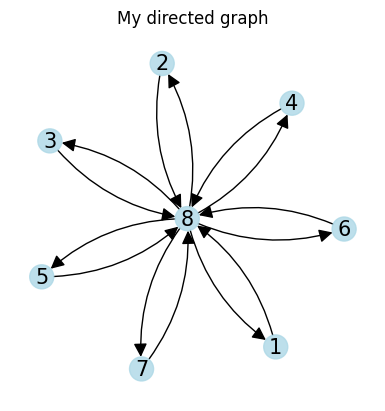

In [6]:
adjacency_list: dict[int, set[int]] = {
    1: {8},
    2: {8},
    3: {8},
    4: {8},
    5: {8},
    6: {8},
    7: {8},
    8: {1, 2, 3, 4, 5, 6, 7},
}
G = adjacency_list_to_digraph(adjacency_list)

pu.show_digraph(G)

In [7]:
katz = nx.katz_centrality_numpy(G, alpha=0.1, beta=1.0)
pagerank = nx.pagerank(G, alpha=0.85)
print("Katz centrality:\n", katz)
print("PageRank centrality:\n", pagerank)

Katz centrality:
 {1: 0.3263649560033096, 8: 0.5043822047323876, 2: 0.32636495600330967, 3: 0.3263649560033096, 4: 0.32636495600330967, 5: 0.3263649560033096, 6: 0.3263649560033096, 7: 0.3263649560033096}
PageRank centrality:
 {1: 0.07577195037478103, 8: 0.46959634737653233, 2: 0.07577195037478103, 3: 0.07577195037478103, 4: 0.07577195037478103, 5: 0.07577195037478103, 6: 0.07577195037478103, 7: 0.07577195037478103}
